<a href="https://colab.research.google.com/github/superbunny38/2021MachineLearning/blob/main/seminar/ImplementationofDecisionTree(Concept_Scratch_Scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Decision Tree (Concept) from Scratch

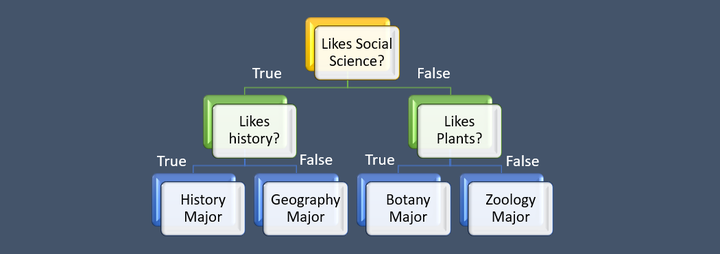

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Criterion of best splitting point

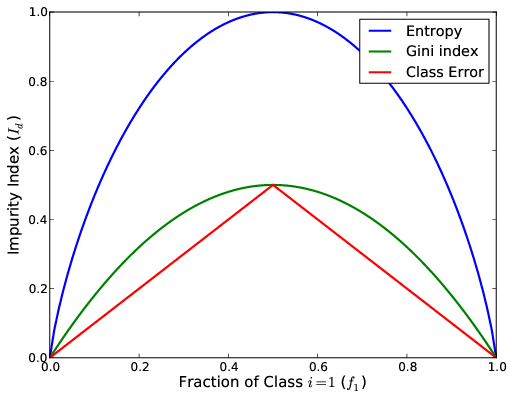

### Gini impurity

$$Gini\, Impurity = 1- \sum^K_{k=1}f_k^2$$

- $K$: number of classes
- $f_k$: fraction of class k takes up of the entire dataset

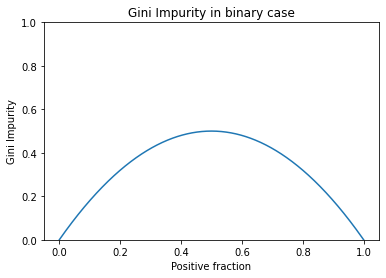

In [47]:
# Plot Gini Impurity in binary case
pos_fraction = np.linspace(0.00, 1.00, 1000)
gini = 1 - pos_fraction**2 - (1-pos_fraction)**2
plt.title("Gini Impurity in binary case")
plt.plot(pos_fraction, gini)
plt.xlabel('Positive fraction')
plt.ylabel('Gini Impurity')
plt.ylim(0, 1)
plt.show()

In [109]:
# Given labels of a data set, the Gini Impurity calculation function
def gini_impurity_demo(labels):
    # When the set is empty, it is also pure
    if not labels:
        return 0
    # Count the occurrences of each label
    counts = np.unique(labels, return_counts=True)[1]
    fractions = counts / float(len(labels))
    return 1 - np.sum(fractions ** 2)

In [110]:
#example    
dataset1 = [1, 1, 0, 1, 0]
dataset2 = [1, 1, 0, 1, 0, 0]
dataset3 = [1, 1, 1, 1]

print('dataset:',dataset1,end = " | ")
print('entropy: {0:.4f}'.format(gini_impurity_demo(dataset1)))
print('dataset:',dataset2,end = " | ")
print('entropy: {0:.4f}'.format(gini_impurity_demo(dataset2)))
print('dataset:',dataset3,end = " | ")
print('entropy: {0:.4f}'.format(gini_impurity_demo(dataset3)))

dataset: [1, 1, 0, 1, 0] | entropy: 0.4800
dataset: [1, 1, 0, 1, 0, 0] | entropy: 0.5000
dataset: [1, 1, 1, 1] | entropy: 0.0000


### Entropy

$$Entropy = -\sum_{k=1}^K f_k  log_2 f_k$$

- $K$: number of class
- $f_k$: fraction of data from class k


$$Information\, Gain = Entropy(before\, split)-Entropy(after\, split)$$


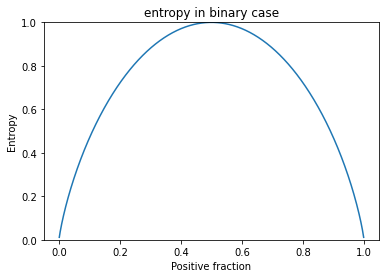

In [53]:
# Plot entropy in binary case
pos_fraction = np.linspace(0.00, 1.00, 1000)
ent = - (pos_fraction * np.log2(pos_fraction) + (1 - pos_fraction) * np.log2(1 - pos_fraction))
plt.plot(pos_fraction, ent)
plt.title("entropy in binary case")
plt.xlabel('Positive fraction')
plt.ylabel('Entropy')
plt.ylim(0, 1)
plt.show()

In [60]:
# Given labels of a data set, the entropy calculation function
def entropy(labels):
    if not labels:
        return 0
    counts = np.unique(labels, return_counts=True)[1]
    fractions = counts / float(len(labels))
    return - np.sum(fractions * np.log2(fractions))

In [61]:
#example    
dataset1 = [1, 1, 0, 1, 0]
dataset2 = [1, 1, 0, 1, 0, 0]
dataset3 = [1, 1, 1, 1]

print('dataset:',dataset1,end = " | ")
print('entropy: {0:.4f}'.format(entropy(dataset1)))
print('dataset:',dataset2,end = " | ")
print('entropy: {0:.4f}'.format(entropy(dataset2)))
print('dataset:',dataset3,end = " | ")
print('entropy: {0:.4f}'.format(entropy(dataset3)))

dataset: [1, 1, 0, 1, 0] | entropy: 0.9710
dataset: [1, 1, 0, 1, 0, 0] | entropy: 1.0000
dataset: [1, 1, 1, 1] | entropy: -0.0000


In [65]:
def information_gain(y, mask, func=entropy):
    s1 = np.sum(mask)
    s2 = mask.size - s1
    if (s1 == 0 | s2 == 0): return 0
    return func(y) - s1 / float(s1 + s2) * func(y[mask]) - s2 / float(s1 + s2) * func(y[np.logical_not(mask)])

the choice of two metrics(Gini Index, Entropy) has little effect on the performance of the trained decision tree.

In [112]:
# Weighted Impurity: combine two metrics into one function

criterion_function = {'gini': gini_impurity_demo, 'entropy': entropy}
def weighted_impurity(groups, criterion='gini'):
    """ Calculate weighted impurity of children after a split
    Args:
        groups (list of children, and a child consists a list of class labels)
        criterion (metric to measure the quality of a split, 'gini' for Gini Impurity or 'entropy' for Information Gain)
    Returns:
        float, weighted impurity
    """
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * criterion_function[criterion](group)
    return weighted_sum

In [71]:
#example
children_1 = [[1, 0, 1], [0, 1]]
children_2 = [[1, 1], [0, 0, 1]]
print('Entropy of #1 split(children_1): {0:.4f}'.format(weighted_impurity(children_1, 'entropy')))
print('Entropy of #2 split(children_2): {0:.4f}'.format(weighted_impurity(children_2, 'entropy')))

# -> children_2가 더 잘 된 split!

Entropy of #1 split(children_1): 0.9510
Entropy of #2 split(children_2): 0.5510


### Utility Functions

#### Utils (repetitive)

In [114]:
#gini index & entropy with numpy
def entropy(labels):
  #when the dataset is empty, it is also pure (entropy = 0)
  if labels.size == 0:
    return 0
  counts = np.unique(labels, return_counts = True)[1]
  fractions = counts/float(len(labels))#f_k
  #print("f_k:",fractions)
  return -np.sum(fractions*np.log2(fractions))

def gini_impurity(labels):
  #When the set is empty, it is also pure(impurity = 0)
  if labels.size == 0:
    return 0
  
  #Count the occurrences of each label
  counts = np.unique(labels, return_counts = True)[1]
  fractions = counts/float(len(labels))#f_k
  #print("f_k:",fractions)
  return 1- np.sum(fractions**2)

criterion_function = {'gini': gini_impurity, 'entropy': entropy}

def weighted_impurity(groups, criterion='gini'):
    """ Calculate weighted impurity of children after a split
    Args:
        groups (list of children, and a child consists a list of class labels)
        criterion (metric to measure the quality of a split, 'gini' for Gini Impurity or 'entropy' for Information Gain)
    Returns:
        float, weighted impurity
    """
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * criterion_function[criterion](group)
    return weighted_sum

#### Utils

Tilde(**~**) operator in python:

Python’s Tilde ~n operator is the **bitwise negation operator**, it takes the number n as binary number and “flips” all bits 0 to 1 and 1 to 0 to obtain the complement binary number. 

In [98]:
~np.array([True,True,False])

array([False, False,  True])

In [99]:
~np.array((False,True))

array([ True, False])

**split_node**: Function to split a node into left and right child

In [124]:
def split_node(X,y,index,value):
  """Split data set X,y based on a feature and a value
  Args:
    X,y: numpy.ndarray, data set
    index: int, index of the feature used for splitting
    value: value of the feature used for splitting
    
  Returns:
    list, list: left and right child, a child is in the format of [X,y]
  """

  x_index = X[:,index]#split based on feature index

  #if this feature is numerical
  if X[0,index].dtype.kind in ['i','f']:#int or float
    mask = x_index >= value#mask for right ex.) mask: [True, True, False]
  
  #if this feature is categorical
  else:
    mask = x_index == value#mask for left
  
  #print("mask:",mask)
  #split into left and right child
  #left and right: disjoint
  left = [X[~mask,:],y[~mask]]
  right = [X[mask,:],y[mask]]
  return left, right

**get_best_split**: greedy search function trying out all possible splits and returning the best one given a selection criterion, along with the resulting children


In [116]:
def get_best_split(X, y, criterion):
    """ Obtain the best splitting point and resulting children for the data set X, y
    Args:
        X, y (numpy.ndarray, data set)
        criterion (gini or entropy)
    Returns:
        dict {index: index of the feature, value: feature value, children: left and right children}
    """
    #initialize
    best_index, best_value, best_score, children = None, None, 1, None

    for index in range(len(X[0])):#greedy (for every feature)
        for value in np.sort(np.unique(X[:, index])):
            groups = split_node(X, y, index, value)
            impurity = weighted_impurity([groups[0][1], groups[1][1]], criterion)#calculate impurity of subgroups created through splitting
            if impurity < best_score:#if currently calculated impurity is smaller than the smallest impurity calculated so far before current moment
                best_index, best_value, best_score, children = index, value, impurity, groups#change best impurity to current impurity
    return {'index': best_index, 'value': best_value, 'children': children}#return index of the feature, feature value, children

**get_leaf**: When a stopping criterion meets, a process at a node stops and the major label will be assigned to the leaf node

**np.bincount**: Count number of occurrences of each value in array of non-negative ints.

In [117]:
labels = [0,0,0,0,1,1,]
print(np.bincount(labels))#0: 4개, 1: 2개
print(np.bincount(labels).argmax())#가장 많은 label 반환

[4 2]
0


In [118]:
def get_leaf(labels):
  #Obtain the leaf as the majority of the labels
  return np.bincount(labels).argmax()

**split**: recursive function that links all these together by

(when to stop splitting)
- assigning a leaf node if one of two children nodes is **empty**
- assigning a leaf node if the current branch depth **exceeds the maximal depth allowed**
- assigning a leaf node if it does **not contain sufficient samples required** for a further split.


Otherwise, proceding with further splits witg the optimal splitting point.

In [119]:
def split(node, max_depth, min_size, depth, criterion):
    """ Split children of a node to construct new nodes or assign them terminals
    Args:
        node (dict, with children info)
        max_depth (int, maximal depth of the tree)
        min_size (int, minimal samples required to further split a child)
        depth (int, current depth of the node)
        criterion (gini or entropy)
    """
    left, right = node['children']
    del (node['children'])

    # if one of two children nodes is empty
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return
    if right[1].size == 0:
        node['left'] = get_leaf(left[1])
        return

    # Check if the current depth exceeds the maximal depth
    if depth >= max_depth:
        node['left'], node['right'] = get_leaf(left[1]), get_leaf(right[1])
        return

    # Check if the left child has enough samples
    if left[1].size <= min_size:
        node['left'] = get_leaf(left[1])

    else:
        # It has enough samples, we further split it
        result = get_best_split(left[0], left[1], criterion)
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['left'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['left'] = get_leaf(result_left[1])
        else:
            node['left'] = result
            split(node['left'], max_depth, min_size, depth + 1, criterion)
            
    # Check if the right child has enough samples
    if right[1].size <= min_size:
        node['right'] = get_leaf(right[1])
    else:
        # It has enough samples, we further split it
        result = get_best_split(right[0], right[1], criterion)
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['right'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['right'] = get_leaf(result_left[1])
        else:
            node['right'] = result
            split(node['right'], max_depth, min_size, depth + 1, criterion)


**train_tree**: entry point of the tree construction

- X_train,  y_train: (list, list, training data)
- **max_depth**: (int, maximal depth of the tree)
- **min_size**: (int, minimal samples required to further split a child)
- **criterion**: (gini or entropy)

In [120]:
def train_tree(X_train, y_train, max_depth, min_size, criterion='gini'):
    """ Construction of a tree starts"""
    X = np.array(X_train)
    y = np.array(y_train)
    root = get_best_split(X, y, criterion)#split root
    split(root, max_depth, min_size, 1, criterion)#construct tree
    return root

code for visualizing tree

In [121]:
CONDITION = {'numerical': {'yes': '>=', 'no': '<'},
             'categorical': {'yes': 'is', 'no': 'is not'}}
def visualize_tree(node, depth=0):
    if isinstance(node, dict):
        if node['value'].dtype.kind in ['i', 'f']:
            condition = CONDITION['numerical']
        else:
            condition = CONDITION['categorical']
        print('{}|- X{} {} {}'.format(depth * '  ', node['index'] + 1, condition['no'], node['value']))
        if 'left' in node:
            visualize_tree(node['left'], depth + 1)
        print('{}|- X{} {} {}'.format(depth * '  ', node['index'] + 1, condition['yes'], node['value']))
        if 'right' in node:
            visualize_tree(node['right'], depth + 1)
    else:
        print('{}[{}]'.format(depth * '  ', node))


## Test with example

### w/ Categorical Example

In [122]:
X_train = [['tech', 'professional'],
           ['fashion', 'student'],
           ['fashion', 'professional'],
           ['sports', 'student'],
           ['tech', 'student'],
           ['tech', 'retired'],
           ['sports', 'professional']]

y_train = [1,
           0,
           0,
           0,
           1,
           0,
           1]

visualize data

In [141]:
tmp_dt = pd.DataFrame({"User interest":[x[0] for x in X_train], "User occupation":[x[1] for x in X_train], "Click":y_train})
tmp_dt

,User interest,User occupation,Click
0,tech,professional,1
1,fashion,student,0
2,fashion,professional,0
3,sports,student,0
4,tech,student,1
5,tech,retired,0
6,sports,professional,1


In [143]:
tree = train_tree(X_train, y_train, 2, 2)
visualize_tree(tree)

|- X1 is not fashion
  |- X2 is not professional
    [0]
  |- X2 is professional
    [1]
|- X1 is fashion
  [0]


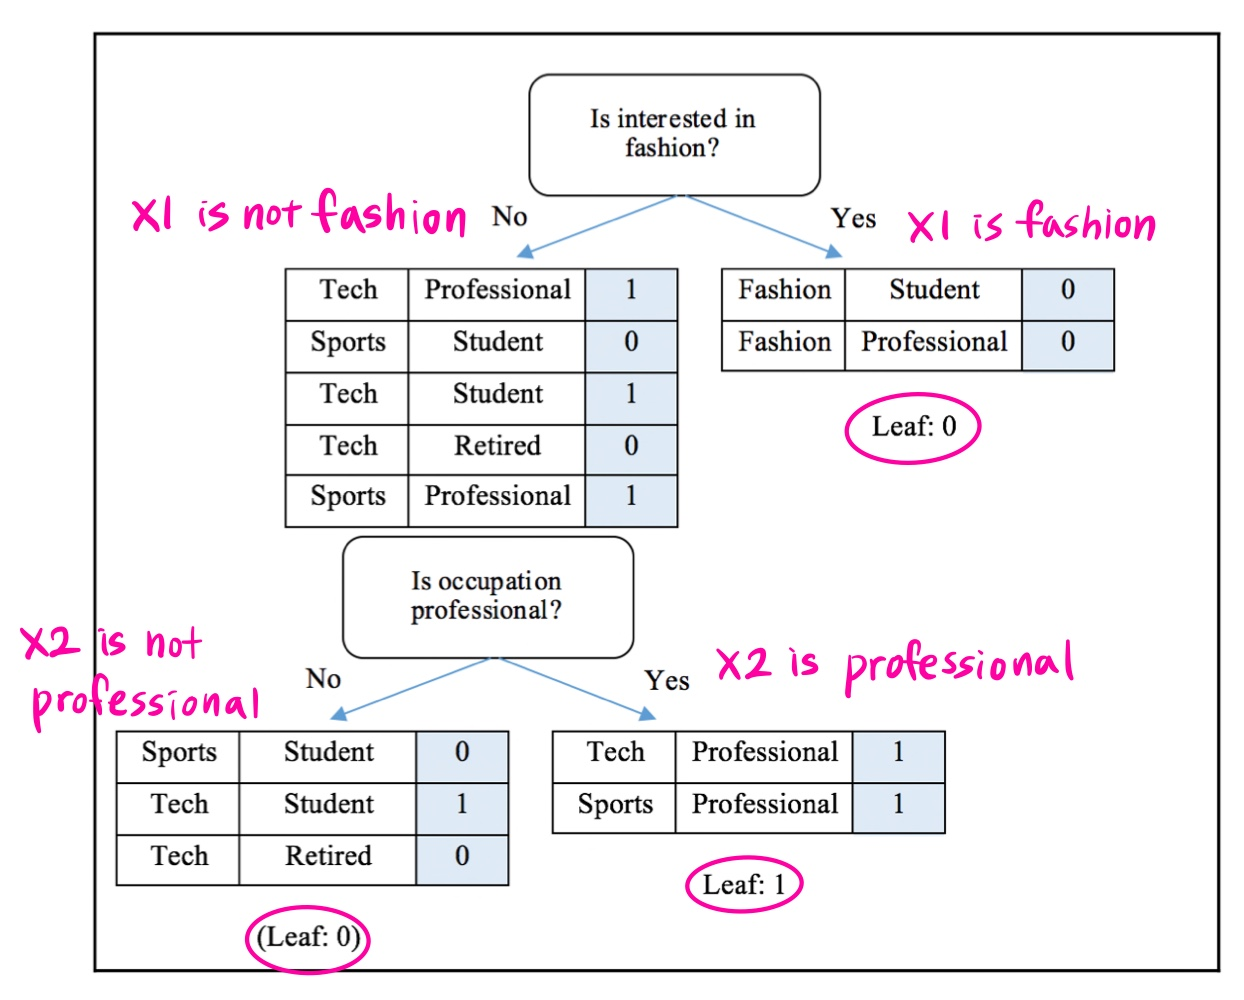

### w/ numerical example

In [144]:
X_train_n = [[6, 7],
           [2, 4],
           [7, 2],
           [3, 6],
           [4, 7],
           [5, 2],
           [1, 6],
           [2, 0],
           [6, 3],
           [4, 1]]

y_train_n = [0,
           0,
           0,
           0,
           0,
           1,
           1,
           1,
           1,
           1]

visualize data

In [147]:
tmp_dt2 = pd.DataFrame({"X1":[x[0] for x in X_train_n], "X2":[x[1] for x in X_train_n], "Click":y_train_n})
tmp_dt2

,X1,X2,Click
0,6,7,0
1,2,4,0
2,7,2,0
3,3,6,0
4,4,7,0
5,5,2,1
6,1,6,1
7,2,0,1
8,6,3,1
9,4,1,1


In [146]:
tree = train_tree(X_train_n, y_train_n, 2, 2)
visualize_tree(tree)

|- X2 < 4
  |- X1 < 7
    [1]
  |- X1 >= 7
    [0]
|- X2 >= 4
  |- X1 < 2
    [1]
  |- X1 >= 2
    [0]


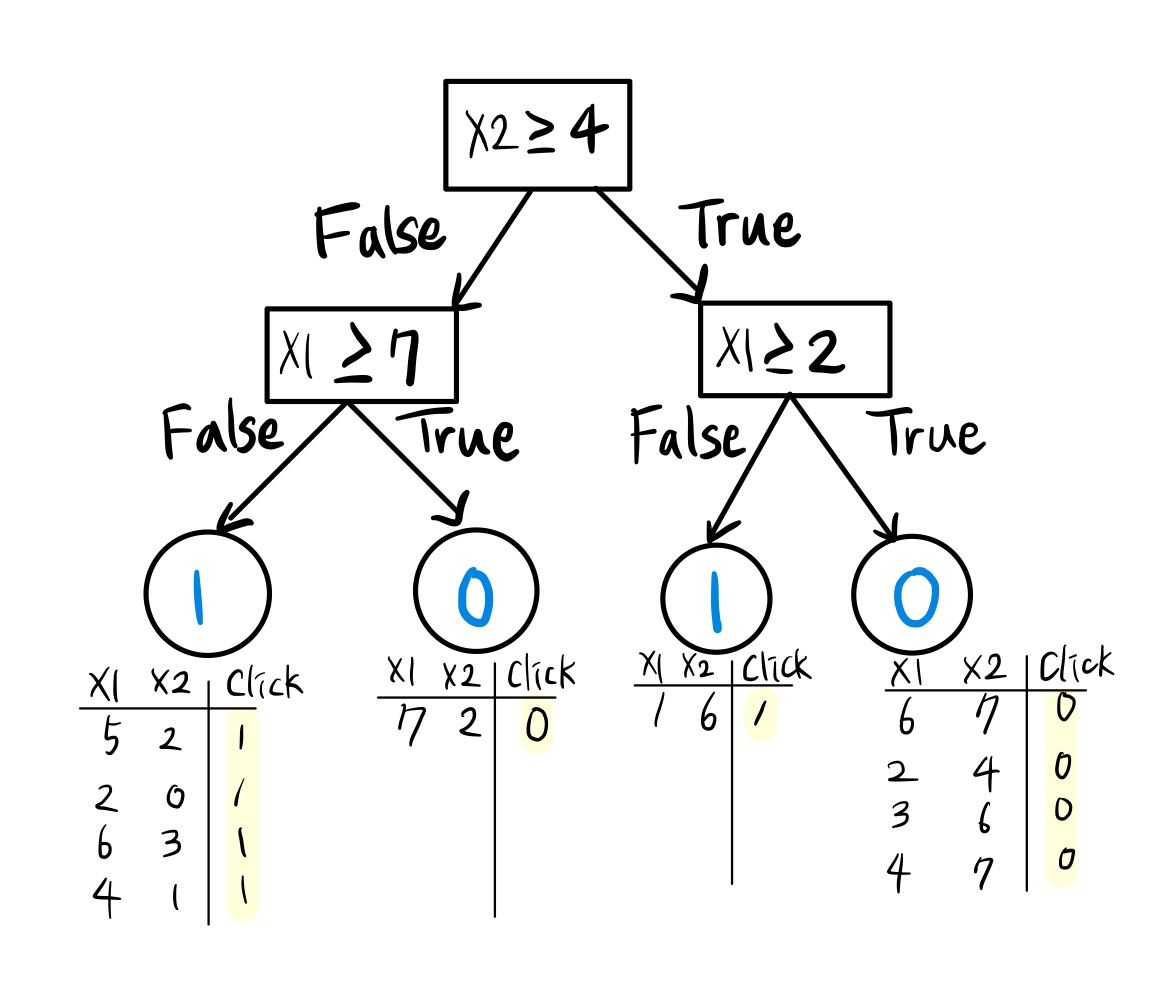

# Use Decision Tree classifier in Scikit_learn

train decision tree classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier
#parameters are the same as classifier previously made from scratch
tree_sk = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=2)
tree_sk.fit(X_train_n, y_train_n)

visualize with GraphViz software

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_sk, out_file='tree.dot', feature_names=['X1', 'X2'], impurity=False, filled=True, class_names=['0', '1'])

In [152]:
!dot -Tpng tree.dot -o tree.png

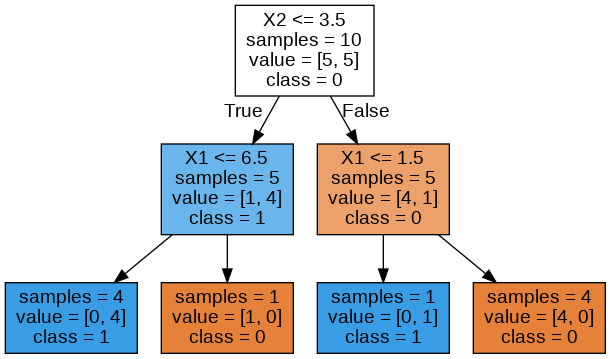

In [154]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename='tree.png')
display(image1)